<a href="https://colab.research.google.com/github/lpashwin/Accelerometer-SenseHat-Py/blob/master/Main_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installing dependencies

In [ ]:
# installing dependency
pip install weibull


In [ ]:
pip install windrose

## Importing dependencies

In [ ]:
# import all dependencies
import pandas as pd
# to perform Weibull analysis
# for a readup on Weibull analysis
# go to https://weibull.readthedocs.io/en/v0.0.11/briefintro.html
import weibull # for fiting weibull
from windrose import WindroseAxes # for windrose
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for better plots
import numpy as np
from scipy import stats
import matplotlib.cm as cm


## Importing the data

In [ ]:
# Data downloaded from https://www.weather.gov/lox/observations_historical
# obtained for Long Beach Airport from 1997 to 2023
# read KLGB_1997-2023.csv into Google Colab before running

wind_data_in=pd.read_csv('KLGB_1997-2023.csv',skiprows=[1])

Dropping NAs

In [ ]:
wind_data_in.dropna(subset=['wind_speed','wind_direction'],inplace=True)

Converting windspeed mph -> knots

In [ ]:
wind_data_in['wind_speed_knots']=wind_data_in['wind_speed']*0.868976

Statistical summary of wind data

In [ ]:
wind_data_in['wind_speed_knots'].describe()

count    245754.000000
mean          4.206961
std           3.597699
min           0.000000
25%           0.000000
50%           4.005979
75%           6.995257
max          45.994900
Name: wind_speed_knots, dtype: float64

Wind speed plots

<Axes: xlabel='Date'>

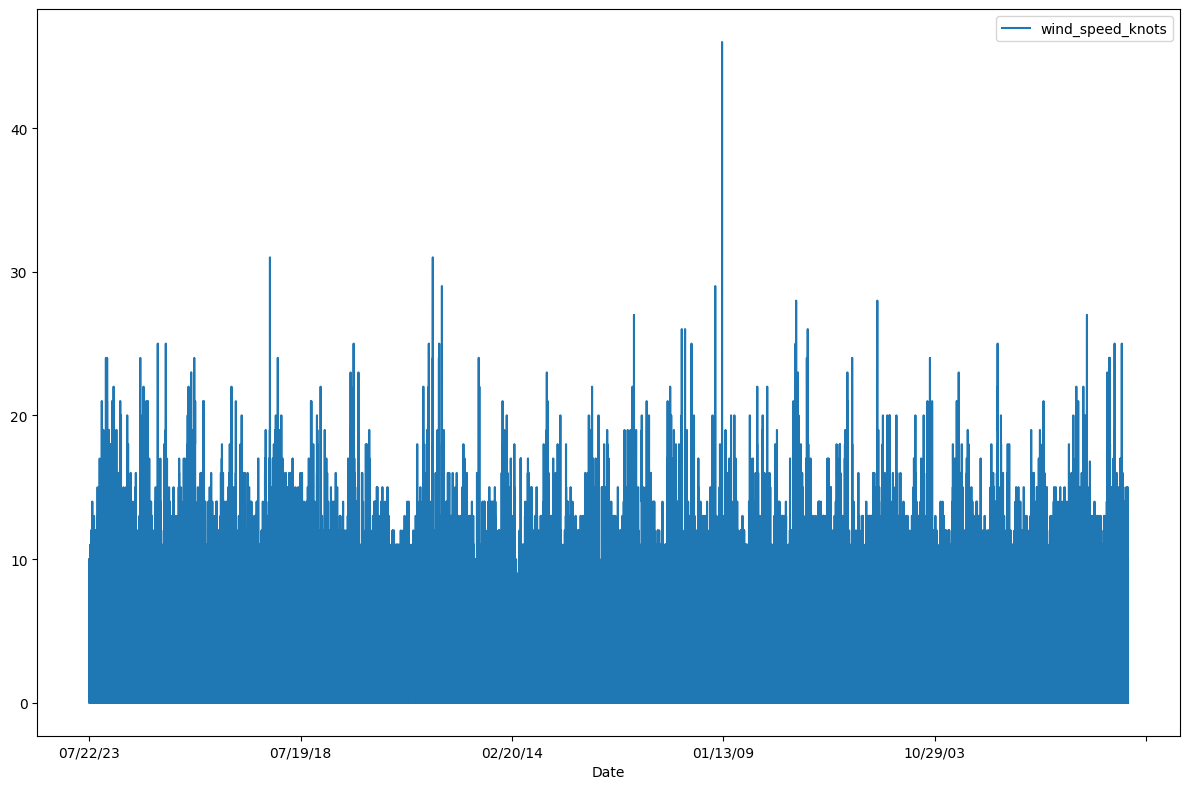

In [ ]:
wind_data_in.plot('Date','wind_speed_knots')

Wind plot histogram (full data)

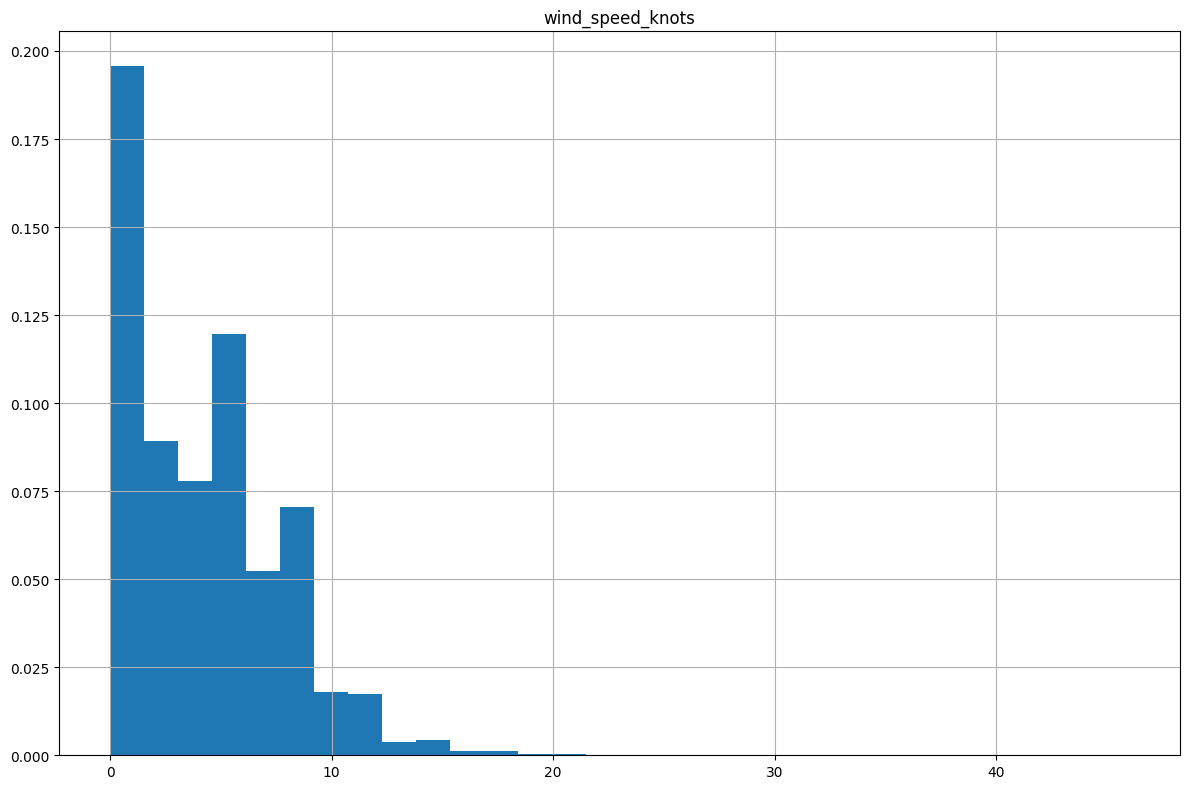

In [ ]:
pt1=wind_data_in.hist('wind_speed_knots',bins=30, density=True)



Daily max windspeed and stats

count    9053.000000
mean       10.421584
std         2.942550
min         2.989277
25%         9.002591
50%         9.993224
75%        11.991869
max        45.994900
Name: wind_speed_knots, dtype: float64

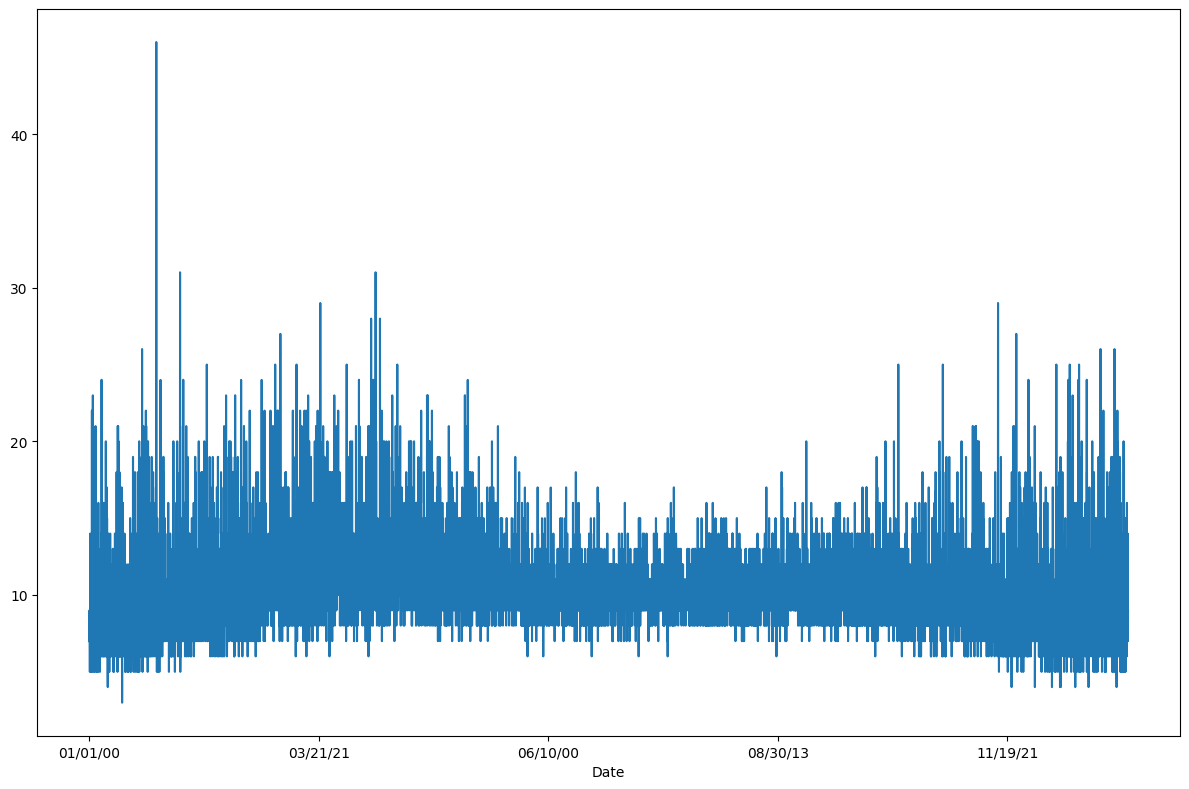

In [ ]:
daily_wind_max=wind_data_in.groupby('Date').max()['wind_speed_knots']
daily_wind_max.plot()
daily_wind_max.describe()


<Axes: >

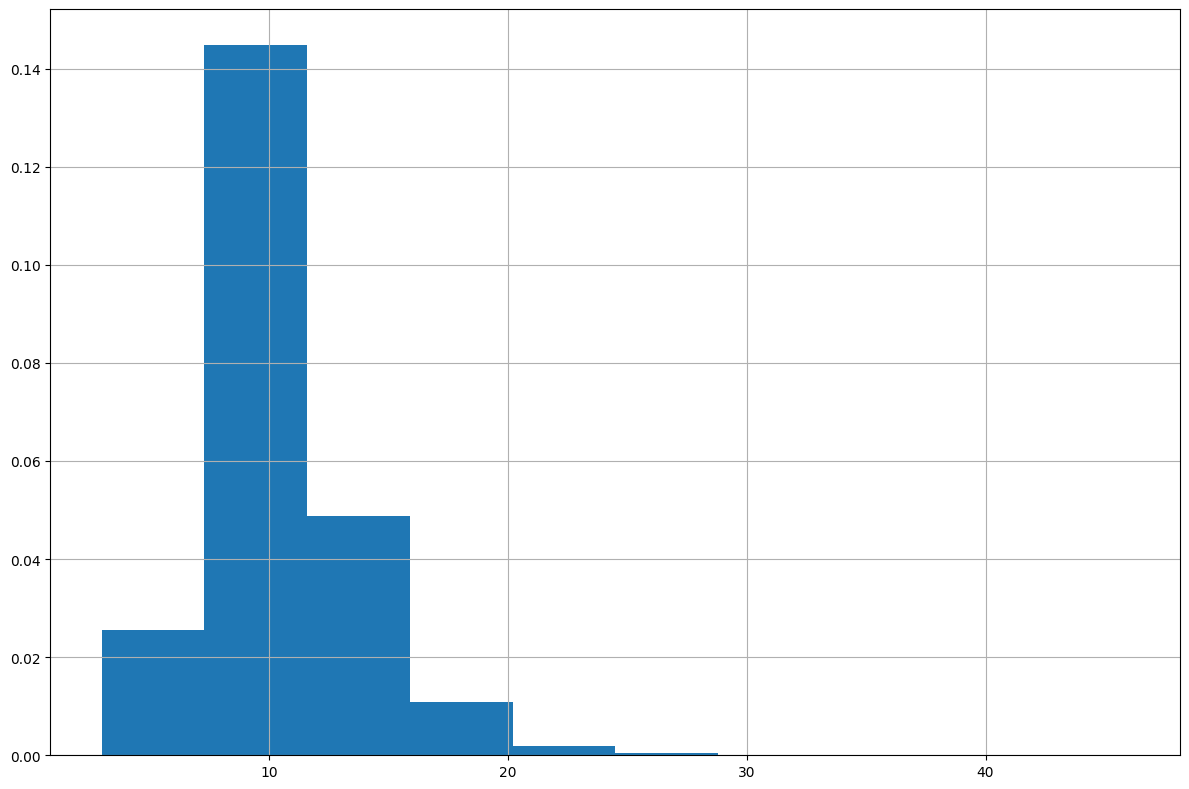

In [ ]:
daily_wind_max.hist(density=True)

<Axes: xlabel='wind_speed_knots', ylabel='Probability'>

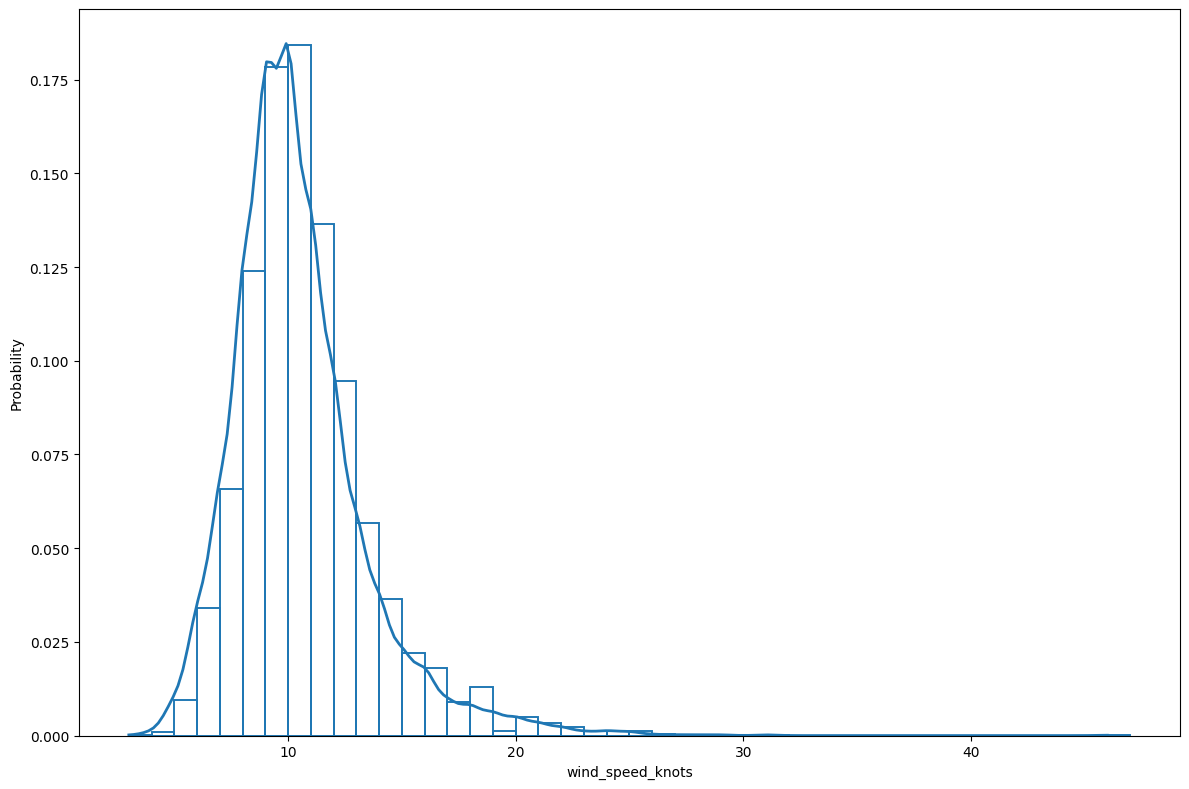

In [ ]:
sns.histplot(daily_wind_max,stat='probability',binwidth=1,kde=True,line_kws={'lw': 2},fill=False)

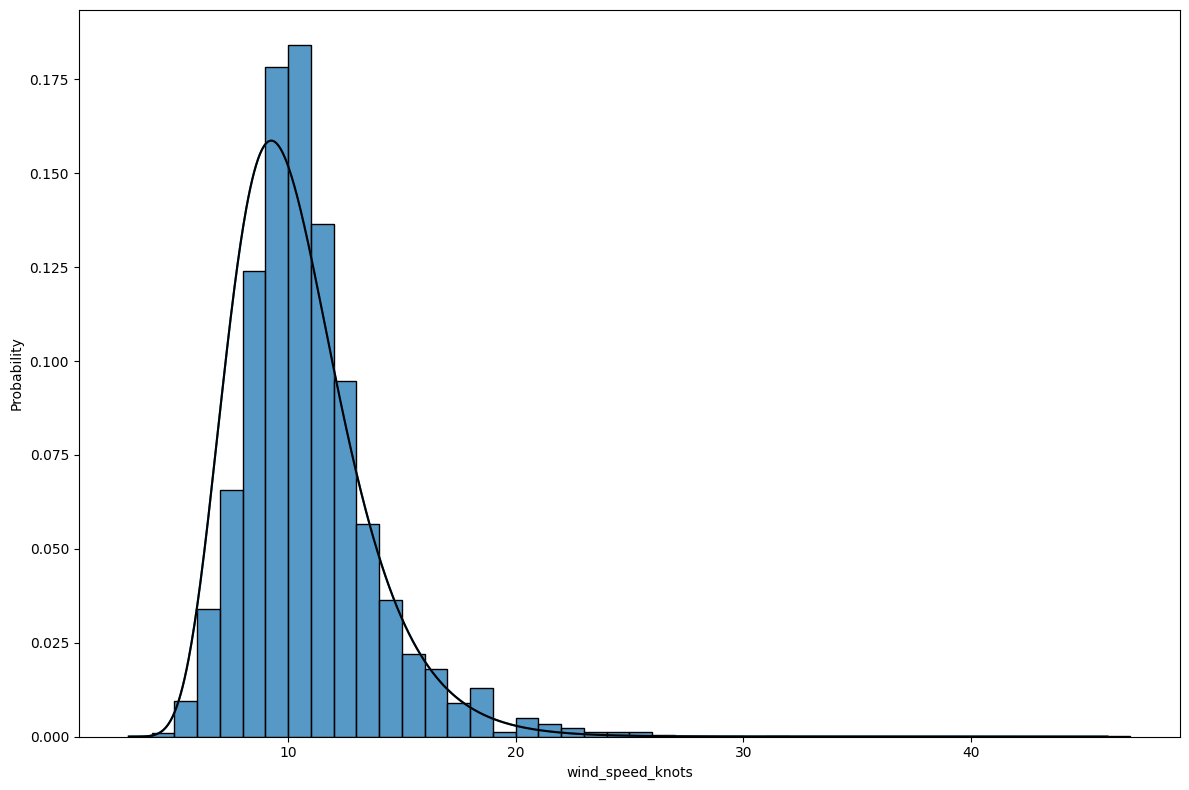

[]

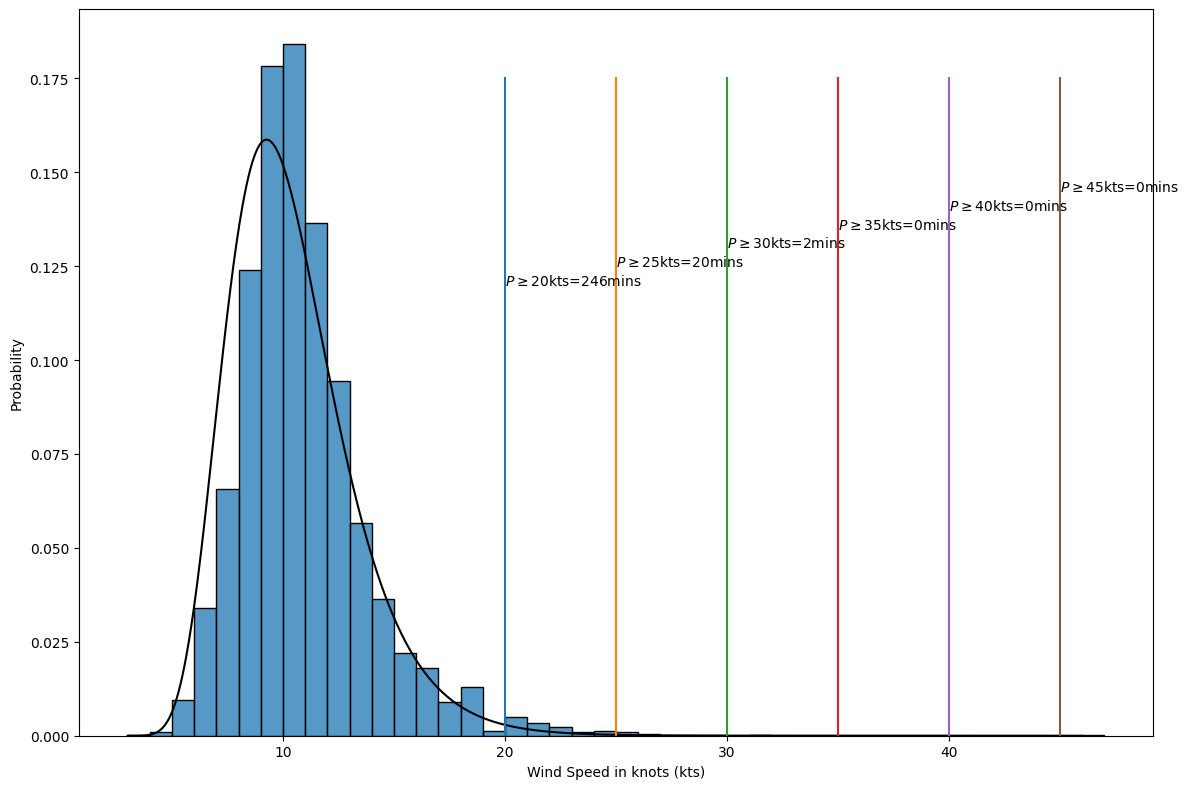

In [ ]:
xmax,xmin=daily_wind_max.min(),daily_wind_max.max()
x=np.linspace(xmin,xmax,1000)
plt.plot(x,stats.lognorm.pdf(x,s=shape,loc=loc,scale=scale))
ax=sns.histplot(daily_wind_max,stat='probability',binwidth=1)
ax.plot(x,stats.lognorm.pdf(x,s=shape,loc=loc,scale=scale),color='k')
plt.show()

# function to calculate 1- cdf
# cdf = cumulative distribution function
def calc_cdf(wind_speed):
    return 1-stats.lognorm.cdf(wind_speed,s=shape,loc=loc,scale=scale)

def calc_hours(prob,hours):
    return prob*hours

# calculate exceedence probablity for 20 to 50 knots
excedence_prob={ii:calc_cdf(ii) for ii in range(20,50,5)}
hours_in_month=24*30
excedence_hours={ii:round(calc_cdf(ii)*24*30,3) for ii in range(20,50,5)}
excedence_mins={ii:round(calc_cdf(ii)*24*30*60,3) for ii in range(20,50,5)}

ax=sns.histplot(daily_wind_max,stat='probability',binwidth=1)
ax.plot(x,stats.lognorm.pdf(x,s=shape,loc=loc,scale=scale),color='k')
[ax.plot([ii,ii],[0,.175]) for ii in range(20,50,5)]
[ax.text(ii,.1+.001*ii,r'$P\geq$'+str(ii)+'kts='+str(round(excedence_mins[ii]))+'mins') for ii in range(20,50,5)]

plt.xlabel('Wind Speed in knots (kts)')
plt.plot()






Net Operational Loss Calculation

[]

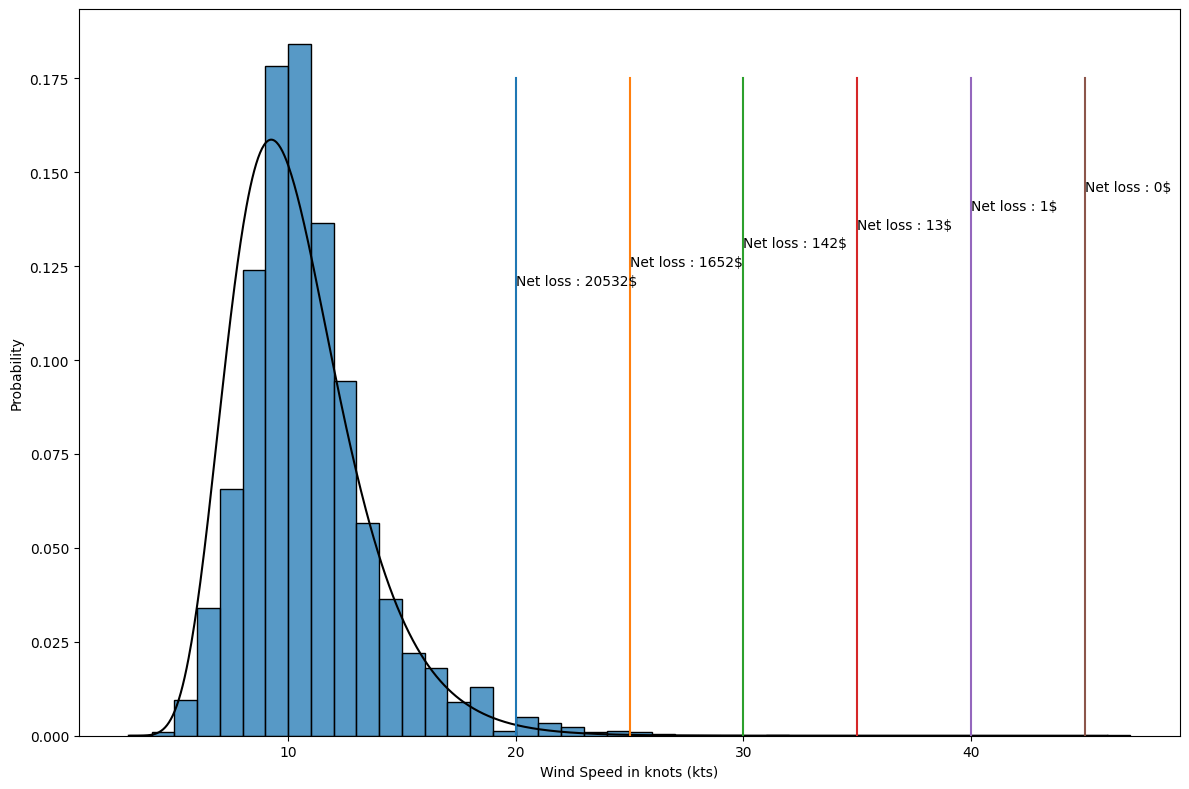

In [ ]:
ax1=sns.histplot(daily_wind_max,stat='probability',binwidth=1)
ax1.plot(x,stats.lognorm.pdf(x,s=shape,loc=loc,scale=scale),color='k')
[ax1.plot([ii,ii],[0,.175]) for ii in range(20,50,5)]
[ax1.text(ii,.1+.001*ii,'Net loss:'+str(round(excedence_mins[ii]*5000./60))+'$') for ii in range(20,50,5)]

plt.xlabel('Wind Speed in knots (kts)')
plt.plot()

Wind Rose Plots (Used to position docks)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


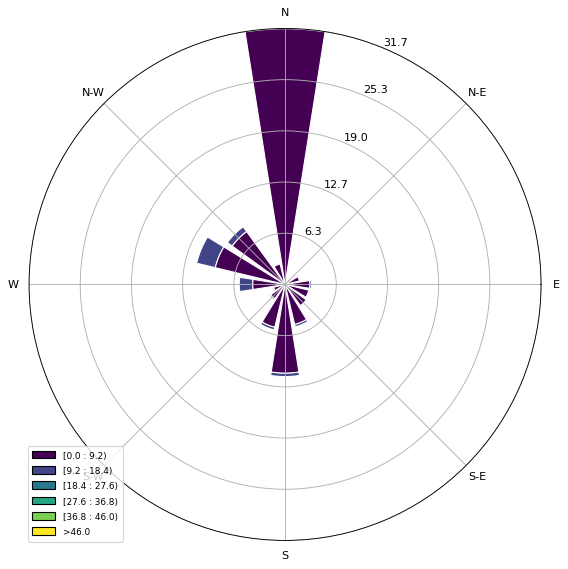

In [ ]:
ws = wind_data_in['wind_speed_knots']
wd = wind_data_in['wind_direction']
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

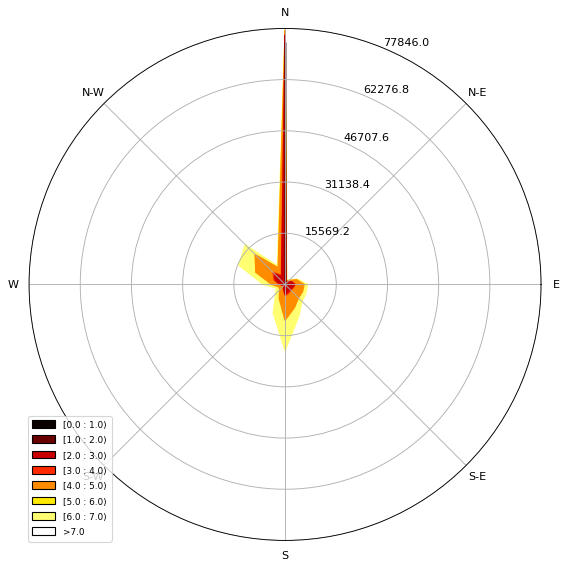

In [ ]:
ax = WindroseAxes.from_ax()
ax.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)
ax.set_legend()